# Задача Саймона

$$f: \{0, 1\}^n \rightarrow \{0, 1\}^n $$

$$
    \exists! b: f(x) = f(y) \Leftrightarrow x = y \oplus b
$$

Требуется определить b?

В классическом случае требуется: $2^{\frac{n}{2}}$ операции

 <center>
    <img src="../images/simon.png" width="520">
</center>

In [33]:
import sys

sys.path.append('..')

import qiskit
import qiskit_aer

b = '10'
n = len(b)

x = qiskit.QuantumRegister(n, 'x')
y = qiskit.QuantumRegister(n, 'y')

c = qiskit.ClassicalRegister(n)

qc = qiskit.QuantumCircuit(x, y, c)

qc.h(x)

qc.barrier()

# Simon oracle
if '1' in b:
    t = b[::-1]
    j = t.find('1')

    for i in range(n):
        qc.cx(i, i + n)

    for i in range(n):
        if t[i] == '1':
            qc.cx(j, i + n)        


qc.barrier()

qc.h(x)

qc.measure(x, c)

qc.draw()

┌───┐ ░                 ░ ┌───┐┌─┐   
 x_0: ┤ H ├─░───■─────────────░─┤ H ├┤M├───
      ├───┤ ░   │             ░ ├───┤└╥┘┌─┐
 x_1: ┤ H ├─░───┼────■────■───░─┤ H ├─╫─┤M├
      └───┘ ░ ┌─┴─┐  │    │   ░ └───┘ ║ └╥┘
 y_0: ──────░─┤ X ├──┼────┼───░───────╫──╫─
            ░ └───┘┌─┴─┐┌─┴─┐ ░       ║  ║ 
 y_1: ──────░──────┤ X ├┤ X ├─░───────╫──╫─
            ░      └───┘└───┘ ░       ║  ║ 
c8: 2/════════════════════════════════╩══╩═
                                      0  1

In [34]:
simulator = qiskit_aer.AerSimulator()

result = simulator.run(qc).result()

counts = result.get_counts(qc)

counts

{'00': 533, '01': 491}

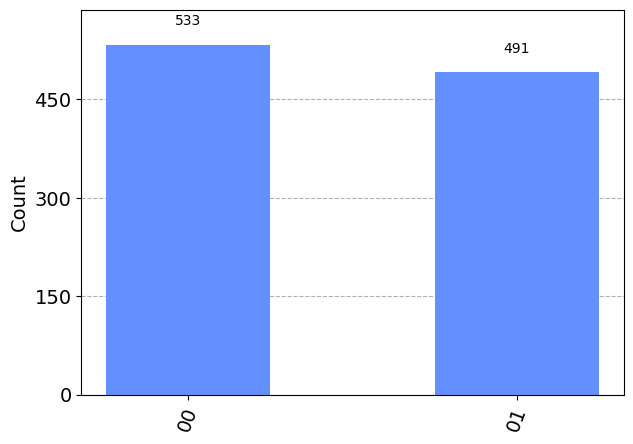

In [35]:
qiskit.visualization.plot_histogram(counts)

In [36]:
from modules.utils.vector import dot_prod

for code in counts:
    print(f'(b . {code}) % 2 = {dot_prod(b, code) % 2}')

(b . 00) % 2 = 0
(b . 01) % 2 = 0


$ b_1 \cdot 0 + b_0 \cdot 1 = b_0 = 0$

Мы имеем либо $b = 10$ либо $b = 00$

$b = 10$ является нетривиальным решением